<a href="https://colab.research.google.com/github/unique-subedi/gene-expression/blob/main/gene_expression_master_kevin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
import time
import math
import numpy as np
from numpy import linalg as LA
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pyreadr
import pyreadr
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/gene-expression/main/data/brain.rda", "brain.rda")
brain = pyreadr.read_r("brain.rda")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 22.0 MB/s 


In [ ]:
expression = pd.DataFrame(brain["expression"])
genes = pd.DataFrame(brain["genes"])
samples = pd.DataFrame(brain["samples"])

In [ ]:
expression.shape

(84, 12600)

In [ ]:
expression.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
01_a_D_f_2.CEL,9.521934,7.453767,7.045636,7.743690,7.728274,8.081243,6.927978,9.294152,8.888816,8.290944,...,7.065597,6.803698,6.631766,6.981474,7.003319,6.999630,7.005495,6.864895,7.030665,14.394582
01_a_I_f_2.CEL,10.930684,9.455482,9.233291,9.777128,9.612399,9.845444,9.149639,10.580062,11.505571,9.846817,...,9.366604,9.067484,8.945584,9.118070,9.137492,9.067202,9.129742,9.256544,9.171725,15.494106
01_a_M_f_1.CEL,6.852731,5.298974,5.033266,6.040661,5.890083,5.810144,5.098923,6.240855,7.280948,6.124910,...,5.374457,5.165619,5.032617,5.382904,5.509690,5.113946,5.273243,5.321357,5.321636,12.856782
01_c_D_f_1.CEL,7.285181,6.258114,6.119443,6.631768,6.744592,6.589478,6.156638,7.417750,8.663882,8.203275,...,6.332162,6.278864,6.108778,6.341791,6.339638,6.167335,6.170734,6.734936,6.275118,13.683484
01_c_I_f_2.CEL,11.224543,9.800931,9.407753,10.113212,9.871853,10.495533,9.449701,11.084619,11.969619,10.479006,...,9.443910,9.242560,9.272848,9.435175,9.448927,9.395768,9.306998,9.863770,9.404475,15.494106


In [ ]:
samples.head()

,patient,sex,region,lab,chip.version
rownames,,,,,
01_a_D_f_2.CEL,patient_01,female,A.C. cortex,Davis,v2
01_a_I_f_2.CEL,patient_01,female,A.C. cortex,Irvine,v2
01_a_M_f_1.CEL,patient_01,female,A.C. cortex,Michigan,v1
01_c_D_f_1.CEL,patient_01,female,cerebellum,Davis,v1
01_c_I_f_2.CEL,patient_01,female,cerebellum,Irvine,v2


In [ ]:
genes.head()

,sym,chrom
rownames,,
1000_at,MAPK3,16
1001_at,TIE1,1
1002_f_at,CYP2C19,10
1003_s_at,CXCR5,11
1004_at,CXCR5,11


Comparing results from Davis, Irvine and Michigan

In [ ]:
davis = expression[expression.index.str.contains('_D_')]
irvine = expression[expression.index.str.contains('_I_')]
michigan = expression[expression.index.str.contains('_M_')]
davis.index = [x.replace('_D','').replace('_1','').replace('_2','') for x in davis.index]
irvine.index = [x.replace('_I','').replace('_1','').replace('_2','') for x in irvine.index]
michigan.index = [x.replace('_M','').replace('_1','').replace('_2','') for x in michigan.index]

In [ ]:
def histo(var_name):
  sns.histplot(x = irvine[var_name], binwidth = 0.2, color = 'red')
  sns.histplot(x = davis[var_name], binwidth = 0.2, color = 'blue')
  sns.histplot(x = michigan[var_name], binwidth = 0.2, color = 'green')
  plt.legend(labels = ['irvine', 'davis', 'michigan'])

In [ ]:
def linepl(var_name):
  temp = pd.merge(irvine[[var_name]], davis[[var_name]], how = 'left', left_index = True, right_index = True) \
    .merge(michigan[[var_name]], how = 'left', left_index = True, right_index = True)
  plt.plot(np.arange(1,31), temp[var_name + '_x'], label = 'irvine')
  plt.plot(np.arange(1,31), temp[var_name + '_y'], label = 'davis')
  plt.plot(np.arange(1,31), temp[var_name], label = 'michigan')
  plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right")

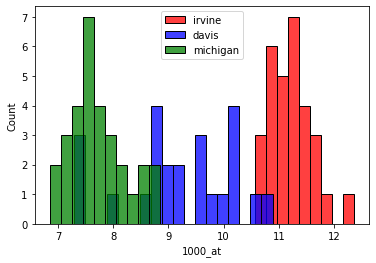

In [ ]:
histo('1000_at')

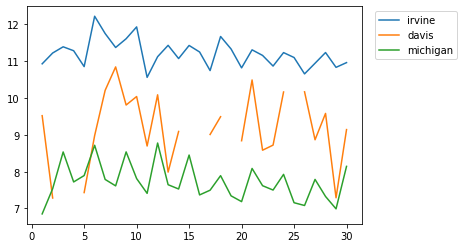

In [ ]:
linepl('1000_at')

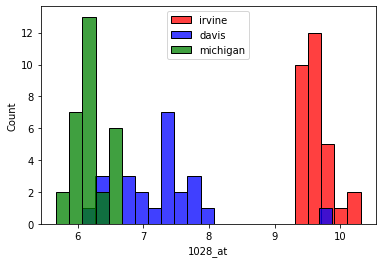

In [ ]:
histo(expression.columns[30])

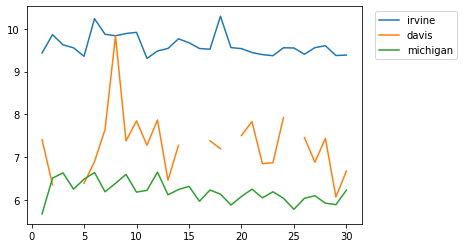

In [ ]:
linepl(expression.columns[30])

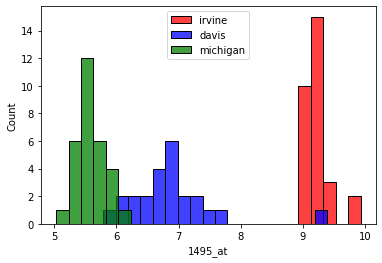

In [ ]:
histo(expression.columns[534])

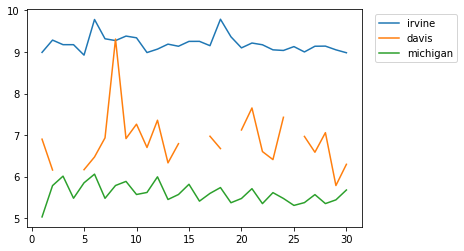

In [ ]:
linepl(expression.columns[534])

In [ ]:
np.corrcoef(expression[expression.columns[534]], expression[expression.columns[30]])

array([[1.        , 0.99641327],
       [0.99641327, 1.        ]])

In [ ]:
np.corrcoef(expression[expression.columns[7]], expression[expression.columns[344]])

array([[1.        , 0.96523181],
       [0.96523181, 1.        ]])

In [ ]:
michigan

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
01_a_f.CEL,6.852731,5.298974,5.033266,6.040661,5.890083,5.810144,5.098923,6.240855,7.280948,6.124910,...,5.374457,5.165619,5.032617,5.382904,5.509690,5.113946,5.273243,5.321357,5.321636,12.856782
01_c_f.CEL,7.538574,6.127074,5.802253,6.981743,6.578298,6.796171,5.985700,6.991276,7.957004,7.132236,...,6.048940,5.859295,5.700322,6.011553,6.060307,5.867749,5.896397,5.961015,6.062082,13.061709
01_d_f.CEL,8.536238,6.377525,5.988068,7.197371,6.872508,6.971540,5.989707,8.069161,8.405470,8.177704,...,6.106663,5.882787,5.633184,6.096874,6.086164,5.817399,5.949295,5.912779,6.085618,13.919305
02_a_m.CEL,7.721345,5.812886,5.665446,6.681512,6.460790,6.633041,5.681871,7.213198,8.216999,8.129531,...,5.740565,5.586448,5.305129,5.665204,5.749193,5.486531,5.478960,5.556478,5.719656,12.892129
02_c_m.CEL,7.895079,6.248714,5.946124,7.013287,6.826076,7.004162,6.030673,7.299343,7.829294,8.081594,...,6.198888,6.006827,5.770594,6.134443,6.192497,6.017745,5.982669,6.052233,6.190589,13.017378
02_d_m.CEL,8.717736,6.356920,6.024032,7.365431,7.048703,7.617187,6.031630,8.206457,9.307843,9.494339,...,6.334917,6.019027,5.680641,6.181441,6.170813,6.020416,5.959995,5.909426,6.163633,13.616167
03_a_f.CEL,7.789601,5.819901,5.609659,6.635914,6.391285,6.589685,5.490427,7.162257,8.115873,8.253429,...,5.690435,5.479970,5.187084,5.551950,5.661011,5.469054,5.439493,5.465072,5.613659,12.860593
03_c_f.CEL,7.615009,6.048279,5.771047,6.884899,6.480433,7.135271,5.892261,7.574549,8.338538,7.991824,...,5.983707,5.826233,5.633096,5.949863,5.922017,5.802720,5.819944,5.834107,5.913008,12.837814
03_d_f.CEL,8.537758,6.230757,5.984910,7.300767,6.911061,7.396665,6.057166,8.062670,9.234367,9.261150,...,6.195142,5.932430,5.565980,6.003753,6.017589,5.905215,5.948662,5.944310,6.099501,13.624417
04_a_m.CEL,7.812973,5.831721,5.636901,6.619073,6.426575,6.510602,5.664982,6.940908,7.920912,7.934987,...,5.841194,5.587379,5.358170,5.725782,5.794067,5.570791,5.580149,5.468514,5.647249,12.810498
